## Exploring book_id_map.csv File

In [1]:
import gzip
import json
import pandas as pd
import gc

In [2]:
# help stream the data without unzipping the file
# stream the data by one line at a time

with gzip.open("../Initial/goodreads_books.json.gz") as f:
    line = f.readline()

In [3]:
line

b'{"isbn": "0312853122", "text_reviews_count": "1", "series": [], "country_code": "US", "language_code": "", "popular_shelves": [{"count": "3", "name": "to-read"}, {"count": "1", "name": "p"}, {"count": "1", "name": "collection"}, {"count": "1", "name": "w-c-fields"}, {"count": "1", "name": "biography"}], "asin": "", "is_ebook": "false", "average_rating": "4.00", "kindle_asin": "", "similar_books": [], "description": "", "format": "Paperback", "link": "https://www.goodreads.com/book/show/5333265-w-c-fields", "authors": [{"author_id": "604031", "role": ""}], "publisher": "St. Martin\'s Press", "num_pages": "256", "publication_day": "1", "isbn13": "9780312853129", "publication_month": "9", "edition_information": "", "publication_year": "1984", "url": "https://www.goodreads.com/book/show/5333265-w-c-fields", "image_url": "https://images.gr-assets.com/books/1310220028m/5333265.jpg", "book_id": "5333265", "ratings_count": "3", "work_id": "5400751", "title": "W.C. Fields: A Life on Film", "t

In [4]:
json.loads(line)

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [5]:
# function to parse the required attributes from the book or item details

def parse_fields(line):
    data = json.loads(line)
    return {
        'isbn': data['isbn'],
        'average_rating': data['average_rating'],
        'similar_books': data['similar_books'],
        'description': data['description'],
        'link': data['link'],
        'authors': data['authors'],
        'publisher': data['publisher'],
        'num_pages': data['num_pages'],
        'publication_day': data['publication_day'],
        'publication_month': data['publication_month'],
        'publication_year': data['publication_year'],
        'isbn13': data['isbn13'],
        'url': data['url'],
        'image_url': data['image_url'],
        'book_id': data['book_id'],
        'ratings_count': data['ratings_count'],
        'title': data['title_without_series'],
    }

In [6]:
# we will go through all the books from the dataset
# we will parse the details of only those books which has got >= 15 ratings or ratings_count and save the book details for later use

books = []

with gzip.open("../Initial/goodreads_books.json.gz") as f:
    while True:
        # reading the line
        line = f.readline()

        # we will break the infinite loop when we reach the end of the dataset file
        if not line:
            break
        
        # parsing the line
        fields = parse_fields(line)
        
        # trying to convert ratings_count into integer
        try:
            ratings_count = int(fields["ratings_count"])
        except ValueError:
            continue

        # we will consider only those books which has more than 15 ratings
        if ratings_count > 15:
            books.append(fields)

In [7]:
# total number of books

len(books)

1308957

- There are 1,308,957 books after filtering through the criteria `ratings_count > 15`

In [8]:
books[0]

{'isbn': '',
 'average_rating': '4.03',
 'similar_books': ['19997',
  '828466',
  '1569323',
  '425389',
  '1176674',
  '262740',
  '3743837',
  '880461',
  '2292726',
  '1883810',
  '1808197',
  '625150',
  '1988046',
  '390170',
  '2620131',
  '383106',
  '1597281'],
 'description': 'Omnibus book club edition containing the Ladies of Madrigyn and the Witches of Wenshar.',
 'link': 'https://www.goodreads.com/book/show/7327624-the-unschooled-wizard',
 'authors': [{'author_id': '10333', 'role': ''}],
 'publisher': 'Nelson Doubleday, Inc.',
 'num_pages': '600',
 'publication_day': '',
 'publication_month': '',
 'publication_year': '1987',
 'isbn13': '',
 'url': 'https://www.goodreads.com/book/show/7327624-the-unschooled-wizard',
 'image_url': 'https://images.gr-assets.com/books/1304100136m/7327624.jpg',
 'book_id': '7327624',
 'ratings_count': '140',
 'title': 'The Unschooled Wizard (Sun Wolf and Starhawk, #1-2)'}

In [9]:
# we will create a data frame

items = pd.DataFrame.from_dict(books)

In [10]:
# we don't need this object anymore

del(books)

In [11]:
# del method only removes the variable from the namespace
# it does not remove the variable from the memory space
# to clear the variable from memory we can use the gc.collect() method

gc.collect()

0

In [12]:
# column list

list(items.columns)

['isbn',
 'average_rating',
 'similar_books',
 'description',
 'link',
 'authors',
 'publisher',
 'num_pages',
 'publication_day',
 'publication_month',
 'publication_year',
 'isbn13',
 'url',
 'image_url',
 'book_id',
 'ratings_count',
 'title']

In [13]:
items.head()

,isbn,average_rating,similar_books,description,link,authors,publisher,num_pages,publication_day,publication_month,publication_year,isbn13,url,image_url,book_id,ratings_count,title
0,,4.03,"[19997, 828466, 1569323, 425389, 1176674, 2627...",Omnibus book club edition containing the Ladie...,https://www.goodreads.com/book/show/7327624-th...,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",600,,,1987,,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,0743294297,3.49,"[6604176, 6054190, 2285777, 82641, 7569453, 70...",Addie Downs and Valerie Adler were eight when ...,https://www.goodreads.com/book/show/6066819-be...,"[{'author_id': '9212', 'role': ''}]",Atria Books,368,14,7,2009,9780743294294,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,Best Friends Forever
2,1599150603,4.13,[],"Relates in vigorous prose the tale of Aeneas, ...",https://www.goodreads.com/book/show/287141.The...,"[{'author_id': '3041852', 'role': ''}]",Yesterday's Classics,162,13,9,2006,9781599150604,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,The Aeneid for Boys and Girls
3,1934876569,4.22,"[948696, 439885, 274955, 12978730, 372986, 216...","To Kara's astonishment, she discovers that a p...",https://www.goodreads.com/book/show/6066812-al...,"[{'author_id': '19158', 'role': ''}]",Seven Seas,216,3,3,2009,9781934876565,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,All's Fairy in Love and War (Avalon: Web of Ma...
4,0922915113,3.81,"[287151, 1104760, 1172822, 440292, 287082, 630...","Wisdom, humor, and dark observations by the fo...",https://www.goodreads.com/book/show/287149.The...,"[{'author_id': '2983296', 'role': ''}, {'autho...",Feral House,147,1,4,2000,9780922915118,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,287149,986,The Devil's Notebook


In [14]:
# checking for null values

items.isnull().sum()

isbn                 0
average_rating       0
similar_books        0
description          0
link                 0
authors              0
publisher            0
num_pages            0
publication_day      0
publication_month    0
publication_year     0
isbn13               0
url                  0
image_url            0
book_id              0
ratings_count        0
title                0
dtype: int64

In [15]:
# checking the datatype of the columns

items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308957 entries, 0 to 1308956
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   isbn               1308957 non-null  object
 1   average_rating     1308957 non-null  object
 2   similar_books      1308957 non-null  object
 3   description        1308957 non-null  object
 4   link               1308957 non-null  object
 5   authors            1308957 non-null  object
 6   publisher          1308957 non-null  object
 7   num_pages          1308957 non-null  object
 8   publication_day    1308957 non-null  object
 9   publication_month  1308957 non-null  object
 10  publication_year   1308957 non-null  object
 11  isbn13             1308957 non-null  object
 12  url                1308957 non-null  object
 13  image_url          1308957 non-null  object
 14  book_id            1308957 non-null  object
 15  ratings_count      1308957 non-null  object
 16  

In [16]:
# convert ratings_count and average_rating columns into numeric

items["ratings_count"] = pd.to_numeric(items["ratings_count"])
items["average_rating"] = pd.to_numeric(items["average_rating"])

items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308957 entries, 0 to 1308956
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   isbn               1308957 non-null  object 
 1   average_rating     1308957 non-null  float64
 2   similar_books      1308957 non-null  object 
 3   description        1308957 non-null  object 
 4   link               1308957 non-null  object 
 5   authors            1308957 non-null  object 
 6   publisher          1308957 non-null  object 
 7   num_pages          1308957 non-null  object 
 8   publication_day    1308957 non-null  object 
 9   publication_month  1308957 non-null  object 
 10  publication_year   1308957 non-null  object 
 11  isbn13             1308957 non-null  object 
 12  url                1308957 non-null  object 
 13  image_url          1308957 non-null  object 
 14  book_id            1308957 non-null  object 
 15  ratings_count      1308957 non-n

In [17]:
# number of duplicate titles

items["title"].duplicated().sum()

318555

In [18]:
# looking at duplicates of the book named "Second Glance"

second_glance = items.loc[items["title"].duplicated()].loc[items["title"]=="Second Glance"]
second_glance

,isbn,average_rating,similar_books,description,link,authors,publisher,num_pages,publication_day,publication_month,publication_year,isbn13,url,image_url,book_id,ratings_count,title
442,174114244X,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...",From the moment Ross's fiancee Aimee was kille...,https://www.goodreads.com/book/show/820229.Sec...,"[{'author_id': '7128', 'role': ''}]",,,,,,9781741142440,https://www.goodreads.com/book/show/820229.Sec...,https://images.gr-assets.com/books/1293769966m...,820229,82,Second Glance
446,0340897260,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...",From the moment Ross's fiancee Aimee was kille...,https://www.goodreads.com/book/show/820226.Sec...,"[{'author_id': '7128', 'role': ''}]",Hodder,483,,,2008,9780340897263,https://www.goodreads.com/book/show/820226.Sec...,https://images.gr-assets.com/books/1363397305m...,820226,334,Second Glance
447,0340897279,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...",From the moment Ross's fiancee Aimee was kille...,https://www.goodreads.com/book/show/820227.Sec...,"[{'author_id': '7128', 'role': ''}]",Hodder,420,,,2007,9780340897270,https://www.goodreads.com/book/show/820227.Sec...,https://images.gr-assets.com/books/1288638236m...,820227,24,Second Glance
133344,,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...",From the moment Ross's fiancee Aimee was kille...,https://www.goodreads.com/book/show/6397205-se...,"[{'author_id': '7128', 'role': ''}]",Atria Books,494,8,4,2003,,https://www.goodreads.com/book/show/6397205-se...,https://images.gr-assets.com/books/1328311935m...,6397205,1200,Second Glance
206189,0743454510,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...","When odd, supernatural events plague the town ...",https://www.goodreads.com/book/show/10911.Seco...,"[{'author_id': '7128', 'role': ''}]",,,,,,9780743454513,https://www.goodreads.com/book/show/10911.Seco...,https://s.gr-assets.com/assets/nophoto/book/11...,10911,33808,Second Glance
529908,1402556470,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...",- From the New York Times best-selling author ...,https://www.goodreads.com/book/show/2355102.Se...,"[{'author_id': '7128', 'role': ''}]",Recorded Books,,30,1,2008,9781402556470,https://www.goodreads.com/book/show/2355102.Se...,https://s.gr-assets.com/assets/nophoto/book/11...,2355102,22,Second Glance
601914,1416549196,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...",From the moment Ross's fiancee Aimee was kille...,https://www.goodreads.com/book/show/11214862-s...,"[{'author_id': '7128', 'role': ''}]",,,,,,9781416549192,https://www.goodreads.com/book/show/11214862-s...,https://images.gr-assets.com/books/1336198689m...,11214862,32,Second Glance
739695,0743454502,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...","""Sometimes I wonder....Can a ghost find you, i...",https://www.goodreads.com/book/show/526465.Sec...,"[{'author_id': '7128', 'role': ''}]",Atria Books,432,8,4,2003,9780743454506,https://www.goodreads.com/book/show/526465.Sec...,https://images.gr-assets.com/books/1346688728m...,526465,157,Second Glance
780998,1416583866,3.79,"[8359929, 723742, 297130, 7570244, 397904, 228...","""Sometimes I wonder....Can a ghost find you, i...",https://www.goodreads.com/book/show/3104040-se...,"[{'author_id': '7128', 'role': ''}]",Washington Square Press,420,5,8,2008,9781416583868,https://www.goodreads.com/book/show/3104040-se...,https://s.gr-assets.com/assets/nophoto/book/11...,3104040,928,Second Glance


In [19]:
second_glance["description"].loc[second_glance["publisher"].str.len() < 1].count()

3

In [20]:
# checking for number of unique values in different column

# values are python list in these columns so it cannot be analyzed directly
cols_to_skip = ["similar_books","authors"]

print('Format: [Column Name - Unique Count - Missing Count]\n')

for col in items.columns:
    if col not in cols_to_skip:
        print(f"{col} - ",len(second_glance[col].unique()), " - " , second_glance[col].loc[second_glance[col].astype(str).str.len() < 1].count())

Format: [Column Name - Unique Count - Missing Count]

isbn -  9  -  1
average_rating -  1  -  0
description -  4  -  0
link -  9  -  0
publisher -  5  -  3
num_pages -  5  -  4
publication_day -  4  -  5
publication_month -  4  -  5
publication_year -  4  -  3
isbn13 -  9  -  1
url -  9  -  0
image_url -  7  -  0
book_id -  9  -  0
ratings_count -  9  -  0
title -  1  -  0


In [21]:
# looking at unique descriptions

print(second_glance["description"].unique())

["From the moment Ross's fiancee Aimee was killed in a car accident, he's been trying to die too. But life won't let him go. His only hope now is that Aimee will come to him.\nSo when he hears of strange happenings at an ancient Indian burial ground near his sister's home, he heads to Comtossok- desperate for the rumours of a haunting to be true.\nWhat he finds there is not Aimee's ghost, but Lia, a very real woman whose life is filled with as many troubled secrets as his own.."
 'When odd, supernatural events plague the town of Comtosook, a ghost hunter is hired by the developer to help convince the residents that there\'s nothing spiritual about the property. An intricate tale of love, haunting memories, and renewal. (An interview about the book is included below the reading guide).\n"Sometimes I wonder....Can a ghost find you, if she wants to?"\nAn intricate tale of love, haunting memories, and renewal, Second Glance begins in current-day Vermont, where an old man puts a piece of la

- Among all the 4 unique description, the following 3 are related and refer the same book
  - From the moment Ross's fiancee...
  - When odd, supernatural events plague...
  - "Sometimes I wonder...

In [22]:
# looking at unique publishers

print(second_glance["publisher"].unique())

['' 'Hodder' 'Atria Books' 'Recorded Books' 'Washington Square Press']


In [23]:
# looking at which description came from which publisher

description_initial_words = ["From the moment","When odd, supernatural",'"Sometimes I wonder']
print('Format: [["publisher","num_pages","publication_day","publication_month","publication_year"]]\n')

for i in description_initial_words:
    print(f"{i} -> \n",second_glance.loc[second_glance["description"].str.startswith(i)][["publisher","num_pages","publication_day","publication_month","publication_year"]].values, )
    print("="*50)

Format: [["publisher","num_pages","publication_day","publication_month","publication_year"]]

From the moment -> 
 [['' '' '' '' '']
 ['Hodder' '483' '' '' '2008']
 ['Hodder' '420' '' '' '2007']
 ['Atria Books' '494' '8' '4' '2003']
 ['' '' '' '' '']]
When odd, supernatural -> 
 [['' '' '' '' '']]
"Sometimes I wonder -> 
 [['Atria Books' '432' '8' '4' '2003']
 ['Washington Square Press' '420' '5' '8' '2008']]


### Create Modified Title to Minimize Search Space

In [24]:
# Removing and replacing unnecessary characters

items["mod_title"] = items["title"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)

In [25]:
# we will normaze the titles or make them lower case

items["mod_title"] = items["mod_title"].str.lower()

In [26]:
# we will replace any extra spaces with a single space

items["mod_title"] = items["mod_title"].str.replace("\s+", " ", regex=True)

In [27]:
# we will keep only those records where the mod_title is not empty or has a length > 0

items = items[items["mod_title"].str.len() > 0]

In [28]:
# final length of the data

len(items) # we can observe a sligt reduction in count which is expected

1302659

### Exporting the data as compressed json - After Processing 1

In [ ]:
# Export DataFrame to JSON with one line per record
# Compress the JSON string and write to a gzip file

with gzip.open('../Processed/itemDetails_RatingCount_gt15_p1.json.gz', 'wt', encoding='utf-8') as file:
    file.write(items.to_json(orient='records', lines=True))

In [ ]:
# execution stop point

10/0

In [48]:
# we can observe that some titles are in language other than english
# during cleaning the mod_title becomes " "
# we will drop those records as well

print(len(items[items["mod_title"].str.len() == 1]))

37931


In [50]:
# getting the index of those records

items_drop = items[items["mod_title"].str.len() == 1].index
items_drop

Index([     28,      37,      38,      43,      65,      72,      85,     118,
           175,     198,
       ...
       1308680, 1308686, 1308691, 1308697, 1308789, 1308850, 1308854, 1308881,
       1308931, 1308940],
      dtype='int64', length=37931)

In [54]:
# we can crossccheck the net number of books that we will get after dropping the records

print(len(items.drop(index=items_drop)))
print(1302659 - 37931)

1264728
1264728


In [55]:
# dropping the records

items.drop(index=items_drop, inplace=True)

items.shape

(1264728, 18)

### Exporting the data as compressed json - After Processing 2

In [56]:
# Export DataFrame to JSON with one line per record
# Compress the JSON string and write to a gzip file

with gzip.open('../Processed/itemDetails_RatingCount_gt15_p2.json.gz', 'wt', encoding='utf-8') as file:
    file.write(items.to_json(orient='records', lines=True))

In [ ]:
# execution stop point

10/0

In [59]:
# testing the file  => opening gzip file streaming fashion

with gzip.open('../Processed/itemDetails_RatingCount_gt15_p1.json.gz') as file:
    line = file.readline()

line

b'{"isbn":"","average_rating":4.03,"similar_books":["19997","828466","1569323","425389","1176674","262740","3743837","880461","2292726","1883810","1808197","625150","1988046","390170","2620131","383106","1597281"],"description":"Omnibus book club edition containing the Ladies of Madrigyn and the Witches of Wenshar.","link":"https:\\/\\/www.goodreads.com\\/book\\/show\\/7327624-the-unschooled-wizard","authors":[{"author_id":"10333","role":""}],"publisher":"Nelson Doubleday, Inc.","num_pages":"600","publication_day":"","publication_month":"","publication_year":"1987","isbn13":"","url":"https:\\/\\/www.goodreads.com\\/book\\/show\\/7327624-the-unschooled-wizard","image_url":"https:\\/\\/images.gr-assets.com\\/books\\/1304100136m\\/7327624.jpg","book_id":"7327624","ratings_count":140,"title":"The Unschooled Wizard (Sun Wolf and Starhawk, #1-2)","mod_title":"the unschooled wizard sun wolf and starhawk 12"}\r\n'

In [60]:
json.loads(line)

{'isbn': '',
 'average_rating': 4.03,
 'similar_books': ['19997',
  '828466',
  '1569323',
  '425389',
  '1176674',
  '262740',
  '3743837',
  '880461',
  '2292726',
  '1883810',
  '1808197',
  '625150',
  '1988046',
  '390170',
  '2620131',
  '383106',
  '1597281'],
 'description': 'Omnibus book club edition containing the Ladies of Madrigyn and the Witches of Wenshar.',
 'link': 'https://www.goodreads.com/book/show/7327624-the-unschooled-wizard',
 'authors': [{'author_id': '10333', 'role': ''}],
 'publisher': 'Nelson Doubleday, Inc.',
 'num_pages': '600',
 'publication_day': '',
 'publication_month': '',
 'publication_year': '1987',
 'isbn13': '',
 'url': 'https://www.goodreads.com/book/show/7327624-the-unschooled-wizard',
 'image_url': 'https://images.gr-assets.com/books/1304100136m/7327624.jpg',
 'book_id': '7327624',
 'ratings_count': 140,
 'title': 'The Unschooled Wizard (Sun Wolf and Starhawk, #1-2)',
 'mod_title': 'the unschooled wizard sun wolf and starhawk 12'}

**JSON vs Compressed JSON**

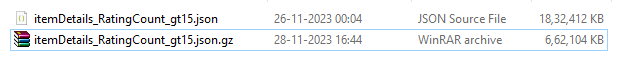